In [5]:
#  1)  As we expected the weather becomes warmer the closer you get to the equator, 0 degrees latitude.  There are also
#      colder temperatures in the northern hemisphere on this particular day which would seem to be a result of the tilt
#      of the earth.
#  2)  There does not appear to be a strong relationship between latitude and humidity levels.  Although there does appear to be
#       a majority of the cities in the 60-100% humidity level.
#  3)  There does not appear to be a strong relationship between latitude and cloudiness.  Although between 30 and 60 degrees
#       latitude there is a strong band of 90% cloudiness.  Could be an indication of seasonal weather in a particular
#       part of the world or just a particularly cloudy in that region of the world on this particular day.
#  4)  There does not to be a strong relationship between latitude and wind speed.  However, the extreme wind speeds do appear
#       to occur when you approach the north and south poles.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

#Import API key
from api_keys import api_key

# Incorporated citypy to determine city based on latitude and longitude
from citipy import citipy

# Output file(csv)
output_data_file = "output_data/cities.csv"

# Range of Latitudes and Longitudes
lat_range = (-90,90)
lng_range = (-180,180)

In [7]:
# List for holding lat_lngs and cities
lats_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

In [21]:
# Perform API Calls

#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).

# set up lists to hold reponse info
lat = []
temp = []
humidity = []
clouds = []
wind = []
dates = []

url = "http://api.openweathermap.org/data/2.5/weather?"
# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="

units = "imperial"

# Loop through the list of cities and perform a request for data on each
for x in range(len(cities)):
    response = requests.get(f"{query_url}{cities[x].upper()}").json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temp.append(np.nan)
        lat.append(np.nan)
        humidity.append(np.nan)
        wind.append(np.nan)
        dates.append(np.nan)
        
# If clouds do not exist, set it to zero.    
    try:
        clouds.append(response['clouds']['all'])
    except KeyError:
        clouds.append(np.nan)
        
# Print city names and data
    print(f'Processing record {x+1} | {cities[x]}')
    print (f'{query_url}{cities[x].upper()}')
    
print("----------------------------------")
print("Data Processing Complete")

#Assembling into data base
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": lat,
                           "Max Temp": temp,
                           "Humidity": humidity,
                           "Cloudiness": clouds,
                           "Wind Speed": wind,
                           "Date": dates})


Processing record 1 | kupang
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=KUPANG
Processing record 2 | jiroft
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=JIROFT
Processing record 3 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=GERALDTON
Processing record 4 | sur
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=SUR
Processing record 5 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=RIBEIRA GRANDE
Processing record 6 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=CAPE TOWN
Processing record 7 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=VILA VEL

Processing record 59 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=MATAURA
Processing record 60 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=BONAVISTA
Processing record 61 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=HOBART
Processing record 62 | kieta
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=KIETA
Processing record 63 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=ATUONA
Processing record 64 | verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=VERKHNYAYA INTA
Processing record 65 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=QA

Processing record 117 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=ATTAWAPISKAT
Processing record 118 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=CHOKURDAKH
Processing record 119 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=PORT ELIZABETH
Processing record 120 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=COMODORO RIVADAVIA
Processing record 121 | mrirt
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=MRIRT
Processing record 122 | fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=FORT-SHEVCHENKO
Processing record 123 | carnarvon
http://api.openweathermap.org/data/2.5/weath

Processing record 173 | elizabeth city
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=ELIZABETH CITY
Processing record 174 | tamandare
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=TAMANDARE
Processing record 175 | kenora
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=KENORA
Processing record 176 | kampot
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=KAMPOT
Processing record 177 | north bend
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=NORTH BEND
Processing record 178 | trairi
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=TRAIRI
Processing record 179 | mansion
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=

Processing record 229 | taft
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=TAFT
Processing record 230 | samusu
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=SAMUSU
Processing record 231 | tarakan
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=TARAKAN
Processing record 232 | aswan
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=ASWAN
Processing record 233 | sakaiminato
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=SAKAIMINATO
Processing record 234 | saleaula
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=SALEAULA
Processing record 235 | monrovia
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=MONROVIA

Processing record 286 | mecca
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=MECCA
Processing record 287 | nacala
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=NACALA
Processing record 288 | umm kaddadah
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=UMM KADDADAH
Processing record 289 | huarmey
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=HUARMEY
Processing record 290 | pedasi
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=PEDASI
Processing record 291 | zapolyarnyy
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=ZAPOLYARNYY
Processing record 292 | tchollire
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperi

Processing record 344 | huilong
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=HUILONG
Processing record 345 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=KIRAKIRA
Processing record 346 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=HOVD
Processing record 347 | portland
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=PORTLAND
Processing record 348 | turayf
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=TURAYF
Processing record 349 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=BATHSHEBA
Processing record 350 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=

Processing record 402 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=TAZOVSKIY
Processing record 403 | baculin
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=BACULIN
Processing record 404 | shache
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=SHACHE
Processing record 405 | naftah
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=NAFTAH
Processing record 406 | denpasar
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=DENPASAR
Processing record 407 | atbasar
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=ATBASAR
Processing record 408 | diapaga
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=DIAPA

Processing record 458 | la palma
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=LA PALMA
Processing record 459 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=PANGNIRTUNG
Processing record 460 | daru
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=DARU
Processing record 461 | veydelevka
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=VEYDELEVKA
Processing record 462 | matameye
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=MATAMEYE
Processing record 463 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=HASAKI
Processing record 464 | mettur
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&

Processing record 515 | nachingwea
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=NACHINGWEA
Processing record 516 | banapur
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=BANAPUR
Processing record 517 | maumere
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=MAUMERE
Processing record 518 | bogorodskoye
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=BOGORODSKOYE
Processing record 519 | gweta
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=GWETA
Processing record 520 | yaan
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=YAAN
Processing record 521 | rawannawi
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q

Processing record 573 | manuk mangkaw
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=MANUK MANGKAW
Processing record 574 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=VARDO
Processing record 575 | yaring
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=YARING
Processing record 576 | kosonsoy
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=KOSONSOY
Processing record 577 | moron
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=MORON
Processing record 578 | starogard gdanski
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&units=imperial&q=STAROGARD GDANSKI
Processing record 579 | mauganj
http://api.openweathermap.org/data/2.5/weather?appid=0be2152f595f4ef5b7854c7138bb4a71&

In [56]:
# create a data frame from cities, lat, temp, humidity, clouds, and wind
weather_df.head()

weather_df.to_csv("C:/Users/bross/Downloads/Week_6_Python_API_ Homework/city_weather_data_from_API", sep='\t')


<function matplotlib.pyplot.show(*args, **kw)>

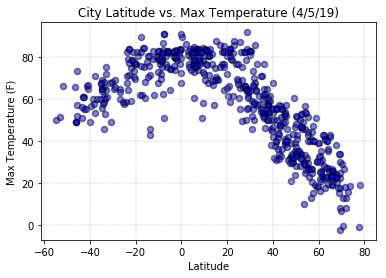

In [48]:
# Build scatter plot showing Latitude vs Max Temp (4.5.19)

weather_df = pd.DataFrame({"City": cities,
                           "Latitude": lat,
                           "MaxTemp": temp,
                           "Humidity": humidity,
                           "Cloudiness": clouds,
                           "WindSpeed": wind,
                           "Date": dates})

Lat_temp=plt.scatter(weather_df.Latitude, weather_df.MaxTemp, alpha=0.5, edgecolors="black", linewidth=1.5, color='blue')

plt.title("City Latitude vs. Max Temperature (4/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='--', linewidth='.4')


# Save Figure 
plt.savefig("C:/Users/bross/Downloads/Week_6_Python_API_ Homework/Lat_temp_scatterplot")


plt.show


<function matplotlib.pyplot.show(*args, **kw)>

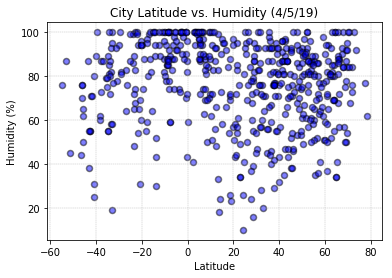

In [49]:
# Build scatter plot showing Latitude vs Humidity (4.5.19)

Lat_humidity=plt.scatter(weather_df.Latitude, weather_df.Humidity, alpha=0.5, edgecolors="black", linewidth=1.5, color='blue')

plt.title("City Latitude vs. Humidity (4/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='--', linewidth='.4')


# Save Figure 
plt.savefig("C:/Users/bross/Downloads/Week_6_Python_API_ Homework/Lat_humidity_scatterplot")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

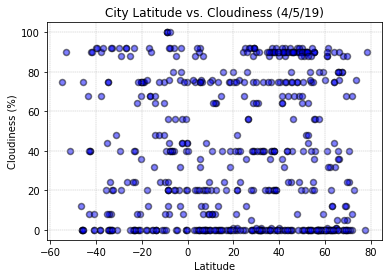

In [54]:
# Build scatter plot showing Latitude vs Cloudiness (4.5.19)

Lat_humidity=plt.scatter(weather_df.Latitude, weather_df.Cloudiness, alpha=0.5, edgecolors="black", linewidth=1.5, color='blue')

plt.title("City Latitude vs. Cloudiness (4/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='--', linewidth='.4')


# Save Figure 
plt.savefig("C:/Users/bross/Downloads/Week_6_Python_API_ Homework/Lat_cloudiness_scatterplot")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

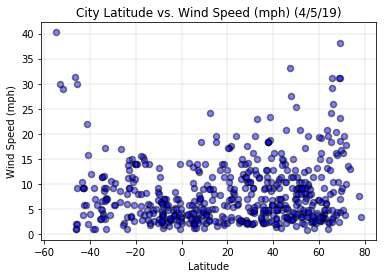

In [52]:
# Build scatter plot showing Latitude vs Wind Speed (4.5.19)

Lat_humidity=plt.scatter(weather_df.Latitude, weather_df.WindSpeed, alpha=0.5, edgecolors="black", linewidth=1.5, color='blue')

plt.title("City Latitude vs. Wind Speed (mph) (4/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='--', linewidth='.4')


# Save Figure 
plt.savefig("C:/Users/bross/Downloads/Week_6_Python_API_ Homework/Lat_wind_speed_scatterplot")

plt.show